# 4.1 Policy Evaluation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [5]:
import gym
from gym import spaces
from gym.utils import seeding

def map_to_coordinates(number):
  row = number // 4
  col = number % 4
  return [row, col]

In [116]:

class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=(4,4)):
        super().__init__()
        self.grid_size = grid_size
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(np.prod(grid_size))
        self.state = np.zeros(grid_size)
        self.state[0,0] = 1

    
    def step(self, action):
        x,y = self.get_pos()
        if action==0 and y > 0:
            #left side and moved left
            y -= 1
        elif action == 1 and x > 0:
            #top side and moved up
            x -=1
        elif action == 2 and y < self.grid_size[1] - 1:
            y +=1
            #right side and moved right
        elif action == 3 and x < self.grid_size[0] - 1:
            #bottom side and moved down
            x += 1
            
        self.state = np.zeros(self.grid_size)
        self.state[x,y] = 1


        observation = self.state.flatten()
        reward = -1
        terminated = self.state[self.grid_size[0] - 1, self.grid_size[1] - 1] == 1 #no unpack in 3.11 :(
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info


    def reset(self, seed=None):
        super().reset(seed=seed)
        self.state = np.zeros(self.grid_size)
        self.state[0,0] = 1
        info = {}
        return self.state, info
    
    def render(self):
        img = np.zeros((*self.grid_size, 3))

        x,y = self.get_pos()
        img[x,y,:] = 1
        return img
    
    def display_render(self):
        plt.figure(figsize=(1,1))
        plt.imshow(self.render())
        plt.axis('off')
        plt.show()

    def close(self):
        pass
    
    def get_pos(self):
        
      x,y = np.where(self.state == 1)
      return x[0], y[0]


     


[-1.         -1.2475     -1.30875625 -1.32391717 -1.2475     -1.6175125
 -1.72425152 -1.75442175 -1.30875625 -1.72425152 -1.8535045  -1.89296175
 -1.32391717 -1.75442175 -1.89296175 -1.93701606]


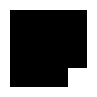

[-2.1125125  -2.55585461 -2.71091294 -2.76050934 -2.55585461 -3.11865253
 -3.3357792  -3.41155883 -2.71091294 -3.3357792  -3.58822677 -3.68036644
 -2.76050934 -3.41155883 -3.68036644 -3.78060434]


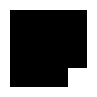

KeyboardInterrupt: 

In [132]:
import numpy as np
import time

env = GridWorldEnv()
theta = 0.01
delta = None
v_pi = np.zeros(env.observation_space.n)
gamma = 0.99  # Discount factor

while delta is None or delta >= theta:
    delta = 0
    for state in range(env.observation_space.n):
        env.reset()
        env.state = np.zeros(env.grid_size)
        env.state[state // env.grid_size[1], state % env.grid_size[1]] = 1  # Set the state

        old_value = v_pi[state]
        new_value = 0
        for action in range(env.action_space.n):
            env.state = np.zeros(env.grid_size)
            env.state[state // env.grid_size[1], state % env.grid_size[1]] = 1  # Reset the state to the current state

            obs, reward, terminated, _, _ = env.step(action)
            sprime = env.state.argmax()
            new_value += 0.25 * (reward + gamma * v_pi[sprime])  # Assume equal probability for actions

        v_pi[state] = new_value
        delta = max(delta, abs(old_value - v_pi[state]))

    print(v_pi)
    env.display_render()
    time.sleep(1)


# 4.3 Policy Iteration